# EDA on Steam kaggle dataset

![title](http://overloadr.com.br/wp-content/uploads/2015/06/steam.png)

## Arthur Zanatta da Costa
## Unicamp
## RA: 116194
## Date: 04/11/17

## About the dataset

This dataset was build based on Steam user data. It contains the following **attributes**:
 
* User ids: unique identifier of steam user
* Title: title of the game
* Status: 
 1. purchase - the game was purchased by the user
 2. play - the game was played by the user
* Hours played: Number of hours the user played the game. If Status = 1, then Hours played =  1 just for convention
* Dummy: This variable does not have any metadata and its value is always 0.

Some interesting properties of this dataset are:

* High number of samples
* Well formatted

The dataset is available at [kaggle](https://www.kaggle.com/tamber/steam-video-games)

## About the EDA

The first steps of the EDA are pre-processing and some basic questions about the dataset. From the insight of the basic questions, more interesting questions can be formulated. Some of the most important results will be summarized in a visualization.

## Table of contents

* First steps
* Data wrangling
* How many games users have on Steam?
* Which are the most purchased games?
* Purchase choices, by user profile
* Did one game users entered Steam to play Dota 2?
* Percentage of Dota 2 players vs number of games purchased
* Final visualization
* Conclusion

## First steps:

Let's start by loading the dataset and pocking it around a bit, to get some general insight.

In [9]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import plotly.plotly as py
import plotly.graph_objs as go

%matplotlib inline

In [10]:
df = pd.read_csv('./data/steam-200k.csv', header=None)
df.columns = ['User id', 'Title', 'Status', 'Hours played', 'dummy']
df.shape

(200000, 5)

In [11]:
df.head()

,User id,Title,Status,Hours played,dummy
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0


In [12]:
df.tail()

,User id,Title,Status,Hours played,dummy
199995,128470551,Titan Souls,play,1.5,0
199996,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199997,128470551,Grand Theft Auto Vice City,play,1.5,0
199998,128470551,RUSH,purchase,1.0,0
199999,128470551,RUSH,play,1.4,0


In [13]:
#Check if the feature dummy is always equal to 0
df[df.dummy != 0]

,User id,Title,Status,Hours played,dummy


In [14]:
status_group = df.groupby('Status')
status_group.count().Title

Status
play         70489
purchase    129511
Name: Title, dtype: int64

In [15]:
df.isnull().values.any()

False

###  Remakrs

* The dummy feature is **useless**, so it will be removed
* There are much more samples of purchased games than played games (83, 7 % more)
* Nevertheless, the number of samples of played games is very high
* The dataset does not have any missing entries

## Data wrangling

In this step, we will perform some data munge to clean and separate the data into more useful forms. Since this dataset is very well behaved and documented, this step should be very quick.

In [16]:
df = df.drop('dummy', axis=1)
purchase_df = df[df.Status == 'purchase']
play_df = df[df.Status == 'play']

In [17]:
count_users = len(purchase_df['User id'].unique())
count_games = len(purchase_df['Title'].unique())
print('Purchase dataframe: ')
print('Number of users: {}'.format(count_users))
print('Number of games: {}'.format(count_games))

Purchase dataframe: 
Number of users: 12393
Number of games: 5155


In [18]:
count_users = len(play_df['User id'].unique())
count_games = len(play_df['Title'].unique())
print('Play dataframe: ')
print('Number of users: {}'.format(count_users))
print('Number of games: {}'.format(count_games))

Play dataframe: 
Number of users: 11350
Number of games: 3600


### Remarks

* Dropped the feature 'dummy', since it is useless
* Splitted the original dataframe into two new ones, based if the game was **purchased** or **played**
* The two news dataframes maintain a huge amount of users and game samples



## How many games users have on Steam?

![purchase game](http://pad3.whstatic.com/images/thumb/1/18/Buy-PC-Games-on-Steam-Step-7-Version-2.jpg/aid1569236-v4-728px-Buy-PC-Games-on-Steam-Step-7-Version-2.jpg)

We want to discover how many games users have on their accounts. We will work with the **purchase dataframe**, since it has more samples and the numbers of hours played is not important.

### Split by group

Let's start by creating a dataframe which shows how many games each user have

In [19]:
user_group = purchase_df.groupby('User id')
games_purchased = user_group.count().Title
games_purchased.head()

User id
5250      21
76767     36
86540     82
103360    10
144736     8
Name: Title, dtype: int64

In [20]:
games_purchased.shape[0]

12393

In [21]:
games_purchased = games_purchased.reset_index()
games_purchased.columns = ['User id', 'Purchases']
games_purchased.head()

,User id,Purchases
0,5250,21
1,76767,36
2,86540,82
3,103360,10
4,144736,8


### Summary statistics

In [22]:
games_purchased.describe().Purchases

count    12393.000000
mean        10.450335
std         35.864269
min          1.000000
25%          1.000000
50%          2.000000
75%          6.000000
max       1075.000000
Name: Purchases, dtype: float64

### Remarks

* The distance between the maximum value and the third quartile is very big (1075 - 6 = 1069). Therefore, this data must have outliers
* The standard deviation is high and the median is very different from the mean. 

From the two statements below, we should consider calculating quantiles with a smaller step and visualize the boxplot for the data;

In [23]:
quantiles = np.arange(0.0, 1.0, 0.1)
games_purchased.describe(percentiles = quantiles).Purchases

count    12393.000000
mean        10.450335
std         35.864269
min          1.000000
0%           1.000000
10%          1.000000
20%          1.000000
30.0%        1.000000
40%          1.000000
50%          2.000000
60.0%        3.000000
70%          5.000000
80%          8.000000
90%         20.000000
max       1075.000000
Name: Purchases, dtype: float64

### Boxplot

([<matplotlib.axis.XTick at 0x7f3691fa4128>],
 <a list of 1 Text xticklabel objects>)

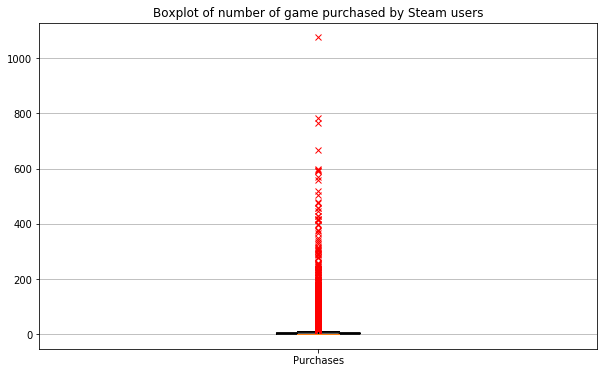

In [24]:
fig, ax1 = plt.subplots(figsize=(10, 6))
bp= plt.boxplot(games_purchased.Purchases.values, '0', 'rx')
ax1.yaxis.grid(True, linestyle='-', which='major', color='black',
               alpha=0.3)
ax1.set_title('Boxplot of number of game purchased by Steam users')
plt.xticks([1], ['Purchases'])

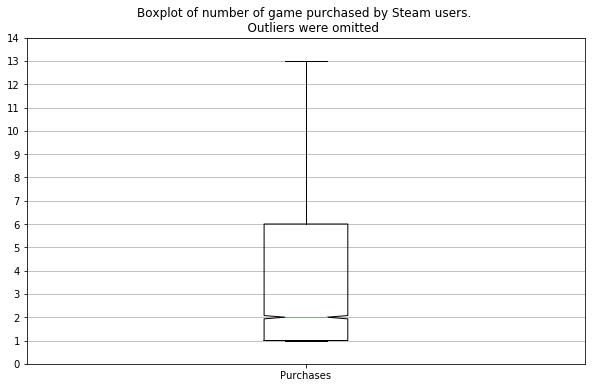

In [25]:
fig, ax1 = plt.subplots(figsize=(10, 6))
bp= plt.boxplot(games_purchased.Purchases.values, '0', '')
ax1.set_title(
    '''Boxplot of number of game purchased by Steam users. 
    Outliers were omitted''')
plt.xticks([1], ['Purchases'])
plt.yticks(np.arange(0, 15, 1))
ax1.yaxis.grid(True, linestyle='-', which='major', color='black',
               alpha=0.3, )

From the boxplot and the new quantiles, we know that **most than half of the users** have at most 2 games. Also, **almost all users** (more than 80 %) have less then 10. Nevertheless, there is a significant amount of outliers, which we will denote as extreme buyers. It would be interesting to know how the percentage of extreme buyers.

### Outlier percentage

In [26]:
q3 = games_purchased.quantile(0.75).Purchases
q1 = games_purchased.quantile(0.25).Purchases
iqr = q3 - q1

#Number of outliers
count_upper_outliers = (
    games_purchased.Purchases > (q3 + 1.5 * iqr)).sum()
count_lower_outliers = (
    games_purchased.Purchases < (q1 - 1.5 * iqr)).sum()
outlier_percentage = count_upper_outliers + count_lower_outliers
outlier_percentage /= games_purchased.shape[0]

print('lower outliers: {}'.format(count_lower_outliers))
print('upper outliers: {}'.format(count_upper_outliers))
print('upper outlier limit: {}'.format(int(q3 + 1.5 * iqr)))
print('outlier percentage: {0:.2f}%'.format(outlier_percentage * 100))

lower outliers: 0
upper outliers: 1677
upper outlier limit: 13
outlier percentage: 13.53%


### Histogram plot

For the final step of this question, we will plot a histogram to help visualize the large concentration of user with own only one or two games

In [27]:
#Informal plot
data = [go.Histogram(x=games_purchased.Purchases)]
py.iplot(data, filename='purchases-histogram-1')

The visualization is not well suited for presentation. Let's reduce the horizontal upper limit

In [28]:
trace0 = go.Histogram(
    x=games_purchased.Purchases,
    histfunc='count',
    name='Number of gamers',
    autobinx=False,
    xbins=dict(
        start=0,
        end=50,
        size=1
    )
)
layout = go.Layout(
    title='Histogram of users with a certain amount of games',
    xaxis=dict(
        title='Number of games'
    ),
    yaxis=dict(
        title='Number of users'
    ),
    bargap=0.2,
    bargroupgap=0.1
)
data = [trace0]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='purchases-histogram-2')

### From the histogram

In [29]:
print('Number of users with one game: 5693.')
print('Percentage of users: {0:0.2f} %'.format(100 * (5693/12393)))

Number of users with one game: 5693.
Percentage of users: 45.94 %


### Remarks

* The **average gamer** buys 10 games
* Because of the outliers, the mean is not a reliable estimator. The median is a better estimator
* The **median** value is 2 games, which means that half or more users only purchased two games
* More than 80 % of the users purchased less than 10 games
* 13.53 % of the data are upper outliers (extreme buyers with more than 13 games)
* The histogram helps us to visualize the rapid decay of number of users with increasing amount of games
* We can see clearly that users with one game correspond to a large chunk of the samples (more than 40 %)
* From the informal histogram, we can see that we are dealing with a long tail distribution

## Which are the most purchased games?

![money](http://animal-dream.com/data_images/money/money3.jpg)

We want to know which games were the most purchased. We will continue to work with the **purchased dataframe**, since the number of hours played is not important.

In [30]:
games_group = purchase_df.groupby('Title')
game_sell = games_group.count()['User id']
rank = game_sell.sort_values(ascending=False)
top = rank[:10].reset_index()
top.columns = ['Title', 'Number of purchasers']
top

,Title,Number of purchasers
0,Dota 2,4841
1,Team Fortress 2,2323
2,Unturned,1563
3,Counter-Strike Global Offensive,1412
4,Half-Life 2 Lost Coast,981
5,Counter-Strike Source,978
6,Left 4 Dead 2,951
7,Counter-Strike,856
8,Warframe,847
9,Half-Life 2 Deathmatch,823


In [31]:
print(
    'Dota 2 purchases are {0:0.2f} % of the total amount'.format(
        100 * rank[0]/rank[:].sum()))

Dota 2 purchases are 3.74 % of the total amount


### Getting more information about the games

Let's discover the developers, publishers, genres, year of launch (the lauch of the first version) and price (p2p or f2p) of the top 10 purchased games. Also, let's discover if the games are intended to be played online or offline and if they are available for console. All the information was retrieved from the wikipedia pages of the games.

In [32]:
new_dataframe = DataFrame(
    [
        ['Dota 2',
         'Valve',
         'Valve',
         'MOBA',
         '2013',
         'free-to-play',
         'online',
         'no'
        ],
        ['Team Fortress 2',
         'Valve',
         'Valve',
         'FPS',
         '2013',
         'free-to-play',
         'online',
         'yes'
        ],
        ['Unturned',
         'Smartly Dressed Games',
         'Smartly Dressed Games',
         'open world/survival',
         '2014',
         'free-to-play',
         'online/offline',
         'no'
        ],
        ['Counter-Strike Global Offensive',
         'Valve',
         'Valve',
         'FPS',
         '2012',
         'pay-to-play',
         'online',
         'yes'
        ],        
        ['Half-Life 2 Lost Coast',
         'Valve',
         'Valve',
         'FPS',
         '2005',
         'free-to-play',
         'offline',
         'no'
        ],  
        ['Counter-Strike Source',
         'Valve',
         'Valve',
         'FPS',
         '2004',
         'pay-to-play',
         'online',
         'no'
        ],  
        ['Left 4 Dead 2',
         'Valve',
         'Valve',
         'FPS/survival horror',
         '2009',
         'pay-to-play',
         'online/offline',
         'yes'
        ],  
        ['Counter-Strike',
         'Valve',
         'Valve',
         'FPS',
         '2000',
         'pay-to-play',
         'online',
         'yes'
        ],  
        ['Warframe',
         'Digital Extremes',
         'Digital Extremes',
         'Third person shooter',
         '2013',
         'free-to-play',
         'online',
         'yes'
        ],  
        ['Half-Life 2 Deathmatch',
         'Valve',
         'Valve',
         'FPS',
         '2004',
         'pay-to-play',
         'online',
         'no'
        ]                                        
    ],
    columns=[
        'Title', 
        'developer', 
        'publisher',
        'genre',
        'year of release',
        'price',
        'online/offline', 
        'console version']
)

In [33]:
augmented_df = pd.merge(top, new_dataframe)
augmented_df

,Title,Number of purchasers,developer,publisher,genre,year of release,price,online/offline,console version
0,Dota 2,4841,Valve,Valve,MOBA,2013,free-to-play,online,no
1,Team Fortress 2,2323,Valve,Valve,FPS,2013,free-to-play,online,yes
2,Unturned,1563,Smartly Dressed Games,Smartly Dressed Games,open world/survival,2014,free-to-play,online/offline,no
3,Counter-Strike Global Offensive,1412,Valve,Valve,FPS,2012,pay-to-play,online,yes
4,Half-Life 2 Lost Coast,981,Valve,Valve,FPS,2005,free-to-play,offline,no
5,Counter-Strike Source,978,Valve,Valve,FPS,2004,pay-to-play,online,no
6,Left 4 Dead 2,951,Valve,Valve,FPS/survival horror,2009,pay-to-play,online/offline,yes
7,Counter-Strike,856,Valve,Valve,FPS,2000,pay-to-play,online,yes
8,Warframe,847,Digital Extremes,Digital Extremes,Third person shooter,2013,free-to-play,online,yes
9,Half-Life 2 Deathmatch,823,Valve,Valve,FPS,2004,pay-to-play,online,no


### Visualization of the augmented dataframe

It is not straightfoward to look at all the fields of the augmented dataframe and have insight. Therefore, we will visualize the most important aspects of the augmented dataframe to help us to acquire the information that the data holds.

In [34]:
titles = top.Title.values
titles[3] = 'Counter-Strike GO'
titles[9] = 'Half-Life 2 DM'

bar_color = [
    'rgb(0,0,200)',
    'rgb(0,0,200)',
    'rgb(200,0,0)',
    'rgb(0,0,200)',
    'rgb(0,0,200)',
    'rgb(0,0,200)',
    'rgb(0,0,200)',
    'rgb(0,0,200)',
    'rgb(0,200,0)',
    'rgb(0,0,200)'
]

line_color = [
    'rgb(8,48,107)',
    'rgb(8,48,107)',
    'rgb(8,48,107)',
    'rgb(8,48,107)',
    'rgb(8,48,107)',
    'rgb(8,48,107)',
    'rgb(8,48,107)',
    'rgb(8,48,107)',
    'rgb(8,48,107)',
    'rgb(8,48,107)'
]

trace0 = go.Bar(
    x=titles,
    y=augmented_df['Number of purchasers'].values,
    text=augmented_df.genre.values,
    marker=dict(
        color=bar_color,
        line=dict(
            color=line_color,
            width=1.5,
        )
    ),
    opacity=0.8   
)

data = [trace0]
layout = go.Layout(
    title='Top 10 most purchased games by Steam users',
    yaxis=dict(
        title='Purchases',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

text = [
    'Valve', 
    'Smartly Dressed Games', 
    'Digital Extremes', 
    'F2P - free-to-play',
    'P2P - pay-to-play',
    'on - online game',
    'off - offline game']

text_color = [
    'rgb(0,0,200)',
    'rgb(200,0,0)',
    'rgb(0,200,0)',
    'rgb(0, 0, 0)',
    'rgb(0, 0, 0)',
    'rgb(0, 0, 0)',
    'rgb(0, 0, 0)']

game_price = augmented_df['price'].values
game_price = [
    'F2P' if price=='free-to-play' else 'P2P' for price in game_price]

game_mode = augmented_df['online/offline'].values
game_mode = [
    'off' if mode=='offline' 
    else 'on/off' if mode=='online/offline'
    else 'on' for mode in game_mode
]

annotations = []
for i, _ in enumerate(text):
    annotations.append(
        dict(
            x=10, y=5000 - 500 * i, text=text[i],
            font=dict(
                family='Arial', 
                size=12,
                color=text_color[i]
            ),
        showarrow=False,)
    )
annotations += [
    dict(
        x=titles[i],
        y=augmented_df['Number of purchasers'].values[i],
        text=game_price[i],
        xanchor='center',
        yanchor='bottom',
        showarrow=False,
    ) for i, _ in enumerate(game_price)]
annotations += [
    dict(
        x=titles[i],
        y=augmented_df['Number of purchasers'].values[i]/2,
        text=game_mode[i],
        xanchor='center',
        yanchor='bottom',
        font=dict(
            family='Arial', 
            size=10,
            color='rgb(255, 255, 255)'),
        showarrow=False,
    ) for i, _ in enumerate(game_mode)] 
annotations += [
    dict(x= 5 ,
         y= 5500,
         text='Developers and publishers are identified by color',
         xanchor='center',
         yanchor='bottom',
         font=dict(
            family='Arial', 
            size=12,
            color='rgb(0, 0, 0)'),
         showarrow=False,
        )]
annotations += [
    dict(x= 5 ,
         y= 5000,
         text='Hover over the game bar to see genre',
         xanchor='center',
         yanchor='bottom',
         font=dict(
            family='Arial', 
            size=12,
            color='rgb(0, 0, 0)'),
         showarrow=False,
        )]
    
layout['annotations'] = annotations

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='top-10-purchaes-bar-chart-1')

### Remarks

* 8 of the 10 most purchased games by Steam users are **developed and published by Valve** (The same company behind the Steam)
* There is the **same amount** of pay-to-play and free-to-play games in the list. This surprised me, because I thought that F2P games would be more purchased than P2P.
* 7 of the 10 most purchased games are FPS and 8 are shoooters
* Dota 2, one of the most popular games in e-sports, is number one in rankings. It purchases corresponds to **3.74 % of the total amount** and it is more than the **double** of the second place (Team Fortress 2).
* Half of the most purchased game are mods/extensions of Half Life (3 Counter Strikes, Half Life 2 Deathmatch, Half Life 2 Lost Coast)
* 8 of the 10 most purchased games can only be played online or are most well known for their online mode

## Purchase choices, by user profile

![choice](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTHLJTTFvDUHpamLSVzok_JdiHRR0m3x2iTr0s3SL7DCeRVuyu47A)

The final question regarding the purchase of games is which games the median/extreme user tends to purchase. Is the choices of the median player equal to the ones of the extreme player? Again, we will work with the **purchase dataframe**

### Outlier separation

In [35]:
upper_outliers = games_purchased[
    games_purchased.Purchases.values > q3 + 1.5 * iqr]
standard_data = games_purchased[
    games_purchased.Purchases.values <= q3 + 1.5 * iqr]

In [36]:
users_ids = purchase_df['User id'].isin(upper_outliers['User id'])
outlier_df = purchase_df[users_ids]

In [37]:
group = outlier_df.groupby('Title')
taste_outlier = group.count()
rank = taste_outlier['User id'].sort_values(ascending=False)

print('Most purchased games by extreme buyers\n')
top_outlier = rank[:10].reset_index()
top_outlier.columns = ['Title', 'Number of purchasers']
top_outlier

Most purchased games by extreme buyers



,Title,Number of purchasers
0,Team Fortress 2,891
1,Counter-Strike Global Offensive,799
2,Dota 2,742
3,Left 4 Dead 2,654
4,Unturned,649
5,The Elder Scrolls V Skyrim,539
6,Garry's Mod,536
7,Counter-Strike Source,510
8,Half-Life 2 Lost Coast,486
9,Portal 2,467


In [38]:
users_ids = purchase_df['User id'].isin(standard_data['User id'])
standard_df = purchase_df[users_ids]

group = standard_df.groupby('Title')
taste_standard = group.count()
rank = taste_standard['User id'].sort_values(ascending=False)

print('Most purchased games by extreme buyers\n')
top_standard = rank[:10].reset_index()
top_standard.columns = ['Title', 'Number of purchasers']
top_standard

Most purchased games by extreme buyers



,Title,Number of purchasers
0,Dota 2,4099
1,Team Fortress 2,1432
2,Unturned,914
3,Counter-Strike Global Offensive,613
4,Half-Life 2 Lost Coast,495
5,Counter-Strike,483
6,Counter-Strike Source,468
7,Half-Life 2 Deathmatch,451
8,Warframe,382
9,Counter-Strike Condition Zero Deleted Scenes,371


In [39]:
table_ranking = pd.concat([top_outlier, top_standard, top], axis=1)
table_ranking.columns = [
    'Ranking for extreme purchasers',
    'Number of purchasers',
    'Ranking for standard purchasers',
    'Number of purchasers',
    'Total ranking',
    'Number of purchasers'
]
table_ranking.index += 1
table_ranking

,Ranking for extreme purchasers,Number of purchasers,Ranking for standard purchasers,Number of purchasers,Total ranking,Number of purchasers
1,Team Fortress 2,891,Dota 2,4099,Dota 2,4841
2,Counter-Strike Global Offensive,799,Team Fortress 2,1432,Team Fortress 2,2323
3,Dota 2,742,Unturned,914,Unturned,1563
4,Left 4 Dead 2,654,Counter-Strike Global Offensive,613,Counter-Strike GO,1412
5,Unturned,649,Half-Life 2 Lost Coast,495,Half-Life 2 Lost Coast,981
6,The Elder Scrolls V Skyrim,539,Counter-Strike,483,Counter-Strike Source,978
7,Garry's Mod,536,Counter-Strike Source,468,Left 4 Dead 2,951
8,Counter-Strike Source,510,Half-Life 2 Deathmatch,451,Counter-Strike,856
9,Half-Life 2 Lost Coast,486,Warframe,382,Warframe,847
10,Portal 2,467,Counter-Strike Condition Zero Deleted Scenes,371,Half-Life 2 DM,823


### Remarks

* The top 10 purchased games **are different** for extreme, standard and total buyers. The difference is both in content (different games) and order (same game in different positions)
* Extreme buyers introduced 3 new games to the ranking: Skyrim, Garry's Mod and Portal 2
* Standard buyers introduced 1 new game to the ranking: CS Condition Zero Deleted Scenes
* Dota 2 was ranked number 3 for extreme purchasers, whereas is number 1 by far in the two other ranking
* Surprisingly, Garry's Mod, which a pay-to-play sandbox game, was listed among the top 10 games in the extreme ranking

## Did one game users entered Steam to play Dota 2?

![dota 2](https://hydra-media.cursecdn.com/dota2.gamepedia.com/5/52/Dota_2.png?version=29fab031014ff95828dca90be4d5d684)

From the last question, we discovered that Dota 2 is more popular among users which are not outliers. Since Dota 2 popularity is bigger among players with less games, it would be interesting to see **how many players have only Dota 2 in their account**. We will continue to work with the **purchase dataframe**.

In [40]:
users_ids = purchase_df['User id'].isin(
    games_purchased[games_purchased.Purchases == 1]['User id']
)
one_game_df = purchase_df[users_ids]
group = one_game_df.groupby('Title')
taste_one_game = group.count()
rank = taste_one_game['User id'].sort_values(ascending=False)

print('Most purchased games by people that only own one game\n')
rank = rank.reset_index()
rank.columns = ['Title', 'Number of users']
rank[:10]

Most purchased games by people that only own one game



,Title,Number of users
0,Dota 2,2858
1,Team Fortress 2,582
2,Unturned,191
3,Counter-Strike Global Offensive,91
4,Sid Meier's Civilization V,88
5,Left 4 Dead 2,61
6,Empire Total War,43
7,Counter-Strike Nexon Zombies,39
8,Serious Sam HD The Second Encounter,32
9,The Elder Scrolls V Skyrim,30


In [41]:
print(
    'Dota 2 purchases are {0:.2f} % of the total amount'.format(
        100 * rank['Number of users'][0]/rank['Number of users'][:].sum()))

Dota 2 purchases are 50.20 % of the total amount


### Remark

* Dota 2 corresponds to **more than half** of the purchases of players with just one game
* Those people made a Steam account just for playing Dota 2
* Since the number of players with only one game corresponds to the vast majority of cases (more than 40 % of the users), we can conclude that Dota 2 is a big responsible for this huge amount of one purchase users
* **Question 1**: it is possible that people with more than one game, have entered Steam because of Dota 2, then purchased other games? We would need a history of dated purchases to answer this question
* **Question 2**: this huge percentage of Dota players holds true for user with more than one game? This question is trick to answer. Let's see below why.


## Percentage of Dota 2 players vs number of games purchased

In [42]:
max_games = games_purchased.Purchases.values.max()
dota2_num_players = []

for i in range(1, max_games + 1):
    
    users_ids = purchase_df['User id'].isin(
        games_purchased[games_purchased.Purchases == i]['User id']
    )
    dota2_df = purchase_df[users_ids]
    group = dota2_df.groupby('Title')
    taste = group.count()['User id']
    taste = taste.reset_index()
    taste.columns = ['Title', 'Number of users']
    num_users = taste[
        taste.Title == 'Dota 2']['Number of users'].values
    if not num_users:
        num_users = [0]
    
    dota2_num_players.append(num_users[0])
    
bin_number = games_purchased.Purchases.max() - games_purchased.Purchases.min() + 1 
hist = np.histogram(
    games_purchased.Purchases, bins=bin_number)[0]

ratio = [
    dota2/total if total != 0 else 0 for 
    dota2, total in zip(dota2_num_players, hist)]

In [43]:
range_ = 1048

trace1 = go.Bar(
    x=list(range(range_)),
    y=ratio[:range_],
    
)

data = [trace1]
layout = go.Layout(
    title='Percentage of Dota 2 players vs number of games purchased',
    xaxis=dict(
        title='Number of purchased games',
        ),
    yaxis=dict(
        title='Percentage of Dota 2 players',
        )
    )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Dota2 percentage')

### Remarks

* From the visualization, we can see that for several high values of number of purchased games, the percentage of users that own Dota 2 is 100 %. **However**, we should remember that these high numbers of purchased games are outliers with few samples, therefore those percentages are not reliable estimators of our distribution
* We would need a more uniform distribution (with a lot of samples) among users with a certain amount of games, in order to the visualization above to give us some real information

## Final visualization

In this final visualization, we will try to incorporate some of the major conclusions we arrieved

In [47]:
titles = top.Title.values
titles[3] = 'Counter-Strike GO'
titles[9] = 'Half-Life 2 DM'

bar_color = [
    'rgb(0,0,200)',
    'rgb(0,0,200)',
    'rgb(200,0,0)',
    'rgb(0,0,200)',
    'rgb(0,0,200)',
    'rgb(0,0,200)',
    'rgb(0,0,200)',
    'rgb(0,0,200)',
    'rgb(0,200,0)',
    'rgb(0,0,200)'
]

line_color = [
    'rgb(8,48,107)',
    'rgb(8,48,107)',
    'rgb(8,48,107)',
    'rgb(8,48,107)',
    'rgb(8,48,107)',
    'rgb(8,48,107)',
    'rgb(8,48,107)',
    'rgb(8,48,107)',
    'rgb(8,48,107)',
    'rgb(8,48,107)'
]


trace0 = go.Bar(
    x=titles,
    y=augmented_df['Number of purchasers'].values,
    text=augmented_df.genre.values,
    marker=dict(
        color=bar_color,
        line=dict(
            color=line_color,
            width=1.5,
        )
    ),
    opacity=0.8
    
)

data = [trace0]
layout = go.Layout(
    title='Top 10 most purchased games by Steam users',
    yaxis=dict(
        title='Purchases',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

text = [
    'Valve', 
    'Smartly Dressed Games', 
    'Digital Extremes', 
    'F2P - free-to-play',
    'P2P - pay-to-play',
    'on - online game',
    'off - offline game']

text_color = [
    'rgb(0,0,200)',
    'rgb(200,0,0)',
    'rgb(0,200,0)',
    'rgb(0, 0, 0)',
    'rgb(0, 0, 0)',
    'rgb(0, 0, 0)',
    'rgb(0, 0, 0)']

game_price = augmented_df['price'].values
game_price = [
    'F2P' if price=='free-to-play' else 'P2P' for price in game_price]

game_mode = augmented_df['online/offline'].values
game_mode = [
    'off' if mode=='offline' 
    else 'on/off' if mode=='online/offline'
    else 'on' for mode in game_mode
]

annotations = []

for i, _ in enumerate(text):
    annotations.append(
        dict(
            x=10, y=5000 - 500 * i, text=text[i],
            font=dict(
                family='Arial', 
                size=12,
                color=text_color[i]
            ),
        showarrow=False,)
    )

annotations += [
    dict(
        x=titles[i],
        y=augmented_df['Number of purchasers'].values[i],
        text=game_price[i],
        xanchor='center',
        yanchor='bottom',
        showarrow=False,
    ) for i, _ in enumerate(game_price)]

annotations += [
    dict(
        x=titles[i],
        y=augmented_df['Number of purchasers'].values[i]/2,
        text=game_mode[i],
        xanchor='center',
        yanchor='bottom',
        font=dict(
            family='Arial', 
            size=10,
            color='rgb(255, 255, 255)'),
        showarrow=False,
    ) for i, _ in enumerate(game_mode)] 

annotations += [
    dict(x= 5 ,
         y= 6000,
         text='Developers and publishers are identified by color',
         xanchor='center',
         yanchor='bottom',
         font=dict(
            family='Arial', 
            size=12,
            color='rgb(0, 0, 0)'),
         showarrow=False,
        )]

annotations += [
    dict(x= 5 ,
         y= 5500,
         text='Hover over the game bar to see genre',
         xanchor='center',
         yanchor='bottom',
         font=dict(
            family='Arial', 
            size=12,
            color='rgb(0, 0, 0)'),
         showarrow=False,
        )]

annotations += [
    dict(x=titles[0],
         y= 2048,
         text='2048 purchases by players which own only one game',
         xanchor='center',
         yanchor='bottom',
         font=dict(
            family='Arial', 
            size=10,
            color='rgb(20, 20, 20)'),
         showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor='#636363',
        ax=200,
        ay=-160
    )
]

layout['annotations'] = annotations

layout['shapes'] = [{
            'type': 'line',
            'x0': -0.4,
            'y0': 2048,
            'x1': 0.4,
            'y1': 2048,
            'line': {
                'color': 'rgb(0, 0, 0)',
                'width': 3,
        }
    }
]
        

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='top-10-purchaes-bar-chart-2')

## Conclusion

In this EDA exercise, we used the a Steam dataset obtained at [kaggle](https://www.kaggle.com/tamber/steam-video-games) to answer some questions related to the users of Steam and the games they purchase. The questions contemplated in this notebook were:

* How many games users have on Steam?
* Which are the most purchased games?
* Purchase choices, by user profile
* Did one game users entered Steam to play Dota 2?
* Percentage of Dota 2 players vs number of games purchased

The EDA resulted in satisfactory answers for most questions.

### How many games users have on Steam?

* More than 40 % of the users have at only one game on Steam
* More than 50 % of the users have at at most two game on Steam
* 13.53 % of users are extreme buyers (outliers), which have more than 14 games (up to 1075)


### Which are the most purchased games?

* 8 of the 10 most purchased games by Steam users are **developed and published by Valve** (The same company behind the Steam)
* 7 of the 10 most purchased games are FPS and 8 are shoooters
* Half of the most purchased game are mods/extensions of Half Life (3 Counter Strikes, Half Life 2 Deathmatch, Half Life 2 Lost Coast)
* 8 of the 10 most purchased games can only be played online or are most well known for their online mode
* There is the same amount of pay-to-play and free-to-play games in the list.

### Purchase choices, by user profile

* The top 10 purchased games **are different** for extreme, standard and total buyers. The difference is both in content (different games) and order (same game in different positions)
* Dota 2 was ranked number 3 for extreme purchasers, whereas is number 1 by far in the two other ranking

### Did one game users entered Steam to play Dota 2?

* Dota 2 corresponds to **more than half** of the purchases of players with just one game. Those people made a Steam account just for playing Dota 2
* Since the number of players with only one game corresponds to the vast majority of cases (more than 40 % of the users), we can conclude that Dota 2 is a big responsible for this huge amount of one purchase users

### Percentage of Dota 2 players vs number of games purchased

Unfortunatly, the percentage of Dota 2 players as a function of the number of purchases is not a reliable estimator, because there is few samples for games purchases > 2

### Final visualization

The final visualization summarize a lot of the answers digged in this notebook. It highlights the answers of the questions 'Which are the most purchased games?' and ' Did one game users entered Steam to play Dota 2?'.